In [1]:
#Import the necessary librararies
import numpy as np #numerical computation
import pandas as pd #for processing and cleaning

#import for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning module for clustering
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("country_data_-75368203.csv")

In [3]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
df.shape

(167, 10)

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [9]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
#Choosing the Child Mortality and Life Expectancy

X = df.iloc[:,[1,7]].values
print(X)

[[ 90.2  56.2]
 [ 16.6  76.3]
 [ 27.3  76.5]
 [119.   60.1]
 [ 10.3  76.8]
 [ 14.5  75.8]
 [ 18.1  73.3]
 [  4.8  82. ]
 [  4.3  80.5]
 [ 39.2  69.1]
 [ 13.8  73.8]
 [  8.6  76. ]
 [ 49.4  70.4]
 [ 14.2  76.7]
 [  5.5  70.4]
 [  4.5  80. ]
 [ 18.8  71.4]
 [111.   61.8]
 [ 42.7  72.1]
 [ 46.6  71.6]
 [  6.9  76.8]
 [ 52.5  57.1]
 [ 19.8  74.2]
 [ 10.5  77.1]
 [ 10.8  73.9]
 [116.   57.9]
 [ 93.6  57.7]
 [ 44.4  66.1]
 [108.   57.3]
 [  5.6  81.3]
 [ 26.5  72.5]
 [149.   47.5]
 [150.   56.5]
 [  8.7  79.1]
 [ 15.7  74.6]
 [ 18.6  76.4]
 [ 88.2  65.9]
 [116.   57.5]
 [ 63.9  60.4]
 [ 10.2  80.4]
 [111.   56.3]
 [  5.5  76.3]
 [  3.6  79.9]
 [  3.4  77.5]
 [  4.1  79.5]
 [ 34.4  74.6]
 [ 25.1  76.7]
 [ 29.1  70.5]
 [ 19.2  74.1]
 [111.   60.9]
 [ 55.2  61.7]
 [  4.5  76. ]
 [ 24.1  65.3]
 [  3.   80. ]
 [  4.2  81.4]
 [ 63.7  62.9]
 [ 80.3  65.5]
 [ 16.5  72.8]
 [  4.2  80.1]
 [ 74.7  62.2]
 [  3.9  80.4]
 [ 14.6  71.3]
 [ 35.4  71.3]
 [109.   58. ]
 [114.   55.6]
 [ 37.6  65.5]
 [208.   3

In [11]:
wcss1=[] #list to hold all wcss

In [12]:
def get_optimum(wcss):
    #Choosing the best number of clusters using WCSS- Within Clusters Sum of Squares

    #loop through 10 possible clusters
    for i in range(1,11):
        # create an instance
        kmeans=KMeans(n_clusters = i, init='k-means++',random_state=3)
        kmeans.fit(X)

        #append the wcss values
        wcss.append(kmeans.inertia_)

In [13]:
#Call the function by passing the list to it

get_optimum(wcss1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
print("The wcss values are : \n",wcss1) # Display the wcss values

The wcss values are : 
 [283114.86239520943, 72991.62451919753, 36666.07676185113, 23601.49159607844, 16184.438633853524, 12283.86331709956, 8906.400631549608, 6118.600944816309, 5316.285892226621, 4562.203094816949]


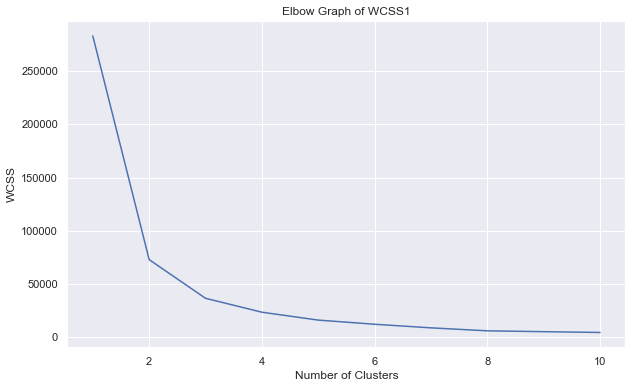

In [15]:
#Plotting an elbow graph to view the wcss

sns.set()
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss1)
plt.title("Elbow Graph of WCSS1")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.savefig('WCSS1.png')
plt.show()

In [16]:
# From the graph the significant drop in value occured in 2 and 3
#Hence the optimum number of clusters is 3

#Training the k_means model by specifying 3 as the number of clusters
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=2)


# returning the labels of each clusters formed
y = kmeans.fit_predict(X)

print(y) # Display the labels

[1 0 0 1 0 0 0 0 0 2 0 0 2 0 0 0 0 1 2 2 0 2 0 0 0 1 1 2 1 0 0 1 1 0 0 0 1
 1 2 0 1 0 0 0 0 0 0 0 0 1 2 0 0 0 0 2 2 0 0 2 0 0 0 1 1 2 1 0 0 2 0 0 2 0
 0 0 0 0 0 0 2 2 0 0 2 0 0 1 1 0 0 0 0 2 1 0 0 1 0 1 0 2 0 0 0 0 1 2 2 2 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2
 0 2 1 0 0 0 2 2 0 0 0 0 0 2 0 0 0 2 2]


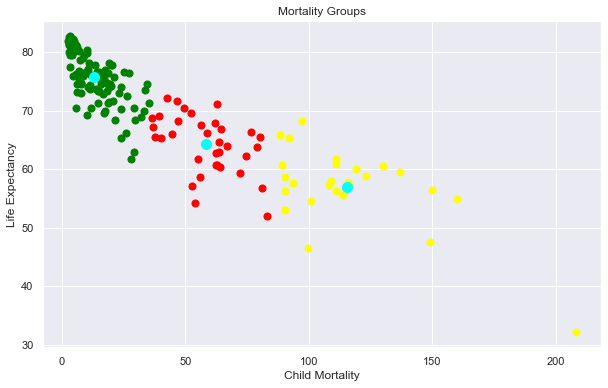

In [18]:
#Visualizing the clusters

plt.figure(figsize=(10,6))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c="green",label="Cluster 1")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c="yellow",label="Cluster 2")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c="red",label="Cluster 3")

#Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='cyan',label='Centroids')

#Labels
plt.xlabel("Child Mortality")
plt.ylabel("Life Expectancy")
plt.title("Mortality Groups")
plt.savefig('Cluster1.png')
plt.show()

**The insight drawn from the plot inidcates about three groups of people: The green clusters shows people country with lowest child mortality having the highest life expectancy which shows areas with good healthcare and there is another set of countries (yellow) having the most child mortality with a reduced life expectancy indicating countries that need imporvement in healthcare system also there is the last cluster(red), indicating countries with medium child mortality having medium life expectancy.**

In [19]:
#Income and the gdpp

X=df.iloc[:,[5,9]].values
print(X)

[[  1610    553]
 [  9930   4090]
 [ 12900   4460]
 [  5900   3530]
 [ 19100  12200]
 [ 18700  10300]
 [  6700   3220]
 [ 41400  51900]
 [ 43200  46900]
 [ 16000   5840]
 [ 22900  28000]
 [ 41100  20700]
 [  2440    758]
 [ 15300  16000]
 [ 16200   6030]
 [ 41100  44400]
 [  7880   4340]
 [  1820    758]
 [  6420   2180]
 [  5410   1980]
 [  9720   4610]
 [ 13300   6350]
 [ 14500  11200]
 [ 80600  35300]
 [ 15300   6840]
 [  1430    575]
 [   764    231]
 [  2520    786]
 [  2660   1310]
 [ 40700  47400]
 [  5830   3310]
 [   888    446]
 [  1930    897]
 [ 19400  12900]
 [  9530   4560]
 [ 10900   6250]
 [  1410    769]
 [   609    334]
 [  5190   2740]
 [ 13000   8200]
 [  2690   1220]
 [ 20100  13500]
 [ 33900  30800]
 [ 28300  19800]
 [ 44000  58000]
 [ 11100   5450]
 [  9350   4660]
 [  9860   2600]
 [  7300   2990]
 [ 33700  17100]
 [  1420    482]
 [ 22700  14600]
 [  7350   3650]
 [ 39800  46200]
 [ 36900  40600]
 [ 15400   8750]
 [  1660    562]
 [  6730   2960]
 [ 40400  4180

In [20]:
wcss2=[] #list to hold all wcss

In [21]:
#Call the function by passing the list to it

get_optimum(wcss2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
print("The wcss values are : \n",wcss2)# Display the wcss values

The wcss values are : 
 [117459162143.76045, 36527917993.42594, 21709766247.175224, 14610296636.228838, 10654993437.51191, 7688412681.034204, 5353400829.668766, 4318898139.367535, 3233260728.227304, 2687886717.241703]


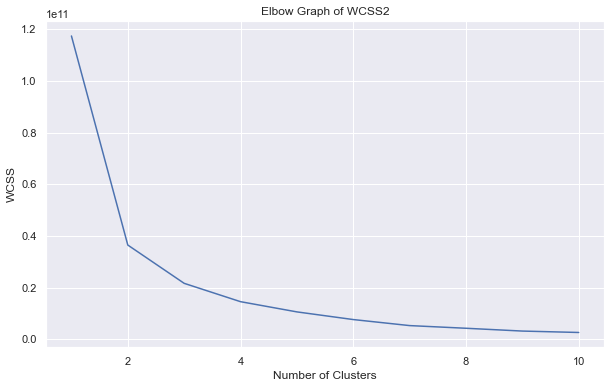

In [23]:
#Plotting an elbow graph to view the wcss

sns.set()
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss2)
plt.title("Elbow Graph of WCSS2")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.savefig('wcss2.png')
plt.show()

In [24]:
#Significant drops occurs at 2,3 and 4
#The optimal wcss is 4

kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state=3)

#return the label of each clusters
y = kmeans.fit_predict(X)

print(y) # Display the labels

centroids = kmeans.cluster_centers_

print("The centroids are :",centroids)

[1 1 1 1 3 3 1 0 0 1 3 3 1 3 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 3 1 1 1
 1 1 1 1 3 3 3 0 1 1 1 1 3 1 3 1 0 0 1 1 1 0 1 3 1 1 1 1 1 1 3 0 1 1 1 1 0
 3 0 1 0 1 3 1 1 0 1 1 3 1 1 1 3 3 2 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 0
 3 1 1 2 3 1 1 1 1 1 3 3 2 3 3 1 1 3 1 1 3 1 0 3 3 1 1 3 3 1 1 1 1 0 0 1 1
 1 1 1 1 1 3 1 1 1 0 0 0 3 1 1 3 1 1 1]
The centroids are : [[47571.42857143 46085.71428571]
 [ 6381.13888889  3027.25925926]
 [93000.         87700.        ]
 [25600.         17347.71428571]]


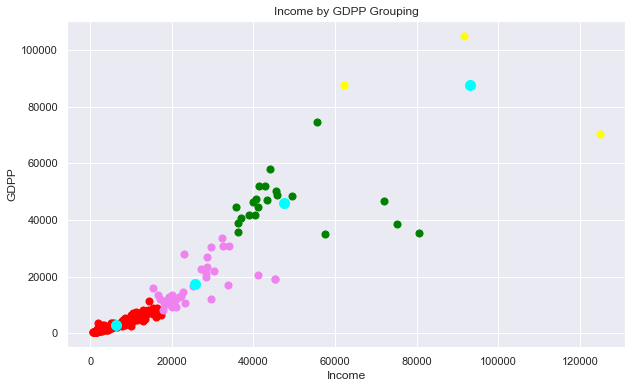

In [25]:
#Visualizing the clusters

plt.figure(figsize=(10,6))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c="green",label="Cluster 1")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c="red",label="Cluster 2")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c="yellow",label="Cluster 3")
plt.scatter(X[y==3,0],X[y==3,1],s=50,c="violet",label="Cluster 3")


#Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='cyan',label='Centroids')

#Labels
plt.xlabel("Income")
plt.ylabel("GDPP")
plt.title("Income by GDPP Grouping")
plt.savefig("Cluster2.png")
plt.show()

**The plot above indicates 4 groups: Countries (yellow) with high income as well as high GDPP indicating that they are prosperous countries i.e having little or no issue economically, Countries (red) with lowest Income and GDPP showing that there are back draw in their economy, Other clusters include countries (green) with moderate GDPP and Income, also that (Indigo) of lower income and GDPP.** 

In [26]:
# Income, GDPP and health

X = df.iloc[:,[3,5,9]].values

print(X)

[[7.58e+00 1.61e+03 5.53e+02]
 [6.55e+00 9.93e+03 4.09e+03]
 [4.17e+00 1.29e+04 4.46e+03]
 [2.85e+00 5.90e+03 3.53e+03]
 [6.03e+00 1.91e+04 1.22e+04]
 [8.10e+00 1.87e+04 1.03e+04]
 [4.40e+00 6.70e+03 3.22e+03]
 [8.73e+00 4.14e+04 5.19e+04]
 [1.10e+01 4.32e+04 4.69e+04]
 [5.88e+00 1.60e+04 5.84e+03]
 [7.89e+00 2.29e+04 2.80e+04]
 [4.97e+00 4.11e+04 2.07e+04]
 [3.52e+00 2.44e+03 7.58e+02]
 [7.97e+00 1.53e+04 1.60e+04]
 [5.61e+00 1.62e+04 6.03e+03]
 [1.07e+01 4.11e+04 4.44e+04]
 [5.20e+00 7.88e+03 4.34e+03]
 [4.10e+00 1.82e+03 7.58e+02]
 [5.20e+00 6.42e+03 2.18e+03]
 [4.84e+00 5.41e+03 1.98e+03]
 [1.11e+01 9.72e+03 4.61e+03]
 [8.30e+00 1.33e+04 6.35e+03]
 [9.01e+00 1.45e+04 1.12e+04]
 [2.84e+00 8.06e+04 3.53e+04]
 [6.87e+00 1.53e+04 6.84e+03]
 [6.74e+00 1.43e+03 5.75e+02]
 [1.16e+01 7.64e+02 2.31e+02]
 [5.68e+00 2.52e+03 7.86e+02]
 [5.13e+00 2.66e+03 1.31e+03]
 [1.13e+01 4.07e+04 4.74e+04]
 [4.09e+00 5.83e+03 3.31e+03]
 [3.98e+00 8.88e+02 4.46e+02]
 [4.53e+00 1.93e+03 8.97e+02]
 [7.96e+00

In [27]:
wcss3=[] #list to hold all wcss

In [28]:
#Pass the list to the function
get_optimum(wcss3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
print("The wcss values are : \n",wcss3) # Display the wcss values

The wcss values are : 
 [117459163396.2498, 36527919135.77229, 21709767309.706856, 14610297724.254707, 10654994514.158928, 7688413567.28117, 5353401691.839212, 4318898994.832119, 3233261590.805605, 2687887534.693206]


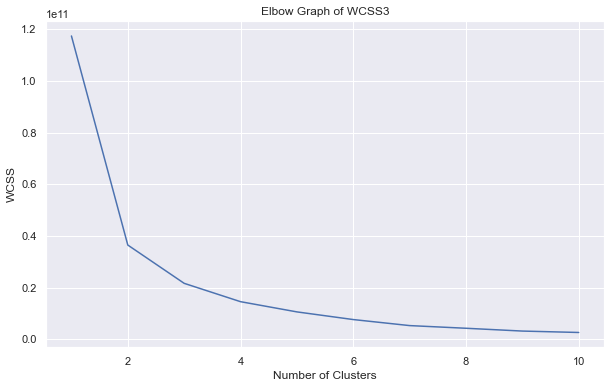

In [30]:
#Plotting an elbow graph to view the wcss
sns.set()
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss2)
plt.title("Elbow Graph of WCSS3")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.savefig("wcss3.png")
plt.show()

In [38]:
#Significant drops occurs at 2,3 and 4
#The optimal wcss is 4

kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state=3)

#return the label of each clusters
y = kmeans.fit_predict(X)

print(y) # Display the labels

centroids = kmeans.cluster_centers_

print("The centroids are :",centroids)

[1 1 1 1 3 3 1 0 0 1 3 3 1 3 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 3 1 1 1
 1 1 1 1 3 3 3 0 1 1 1 1 3 1 3 1 0 0 1 1 1 0 1 3 1 1 1 1 1 1 3 0 1 1 1 1 0
 3 0 1 0 1 3 1 1 0 1 1 3 1 1 1 3 3 2 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 0
 3 1 1 2 3 1 1 1 1 1 3 3 2 3 3 1 1 3 1 1 3 1 0 3 3 1 1 3 3 1 1 1 1 0 0 1 1
 1 1 1 1 1 3 1 1 1 0 0 0 3 1 1 3 1 1 1]
The centroids are : [[9.37380952e+00 4.75714286e+04 4.60857143e+04]
 [6.32157407e+00 6.38113889e+03 3.02725926e+03]
 [6.35333333e+00 9.30000000e+04 8.77000000e+04]
 [6.84514286e+00 2.56000000e+04 1.73477143e+04]]


****

**Advice from the data based on the clustering is that government of countries where their healthcare system have failed and those that are moderate should give attention to thier healthcare systems to reduce the mortality and improve the life expectancy of children. Also, countries with low incomes and Gross Domestic Product (GDPP) should produce more product for sales to increase the revenue generated in the countries**